In [50]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
df = sn.load_dataset('iris')

In [12]:
feature= df.columns[0:3]
x = df.loc[:,feature].values
y = df.loc[:,df.columns[4]].values
x = StandardScaler().fit_transform(x)

In [24]:
pca = PCA(n_components = 2)
prin_com = pca.fit_transform(x)
pcsdf = pd.DataFrame(data=prin_com , columns = ['principle component 1' , 'principle component 2'])
pcadf = pd.concat([pcsdf , df[[df.columns[4]]]] , axis = 1)

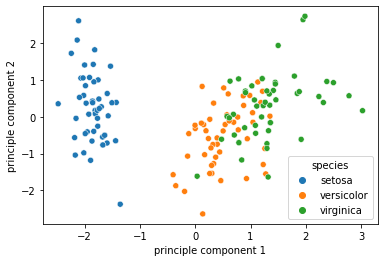

In [27]:
sn.scatterplot(data = pcadf , x='principle component 1' , y='principle component 2' , hue = 'species')

In [28]:
pca.explained_variance_ratio_

array([0.67380995, 0.30247819])

In [38]:
x = pcadf.iloc[:,0:2]
y = pcadf.iloc[:,2]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 23)

In [44]:
model = LogisticRegression(random_state = 3)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

LogisticRegression(random_state=3)

In [47]:
confusion_matrix(y_test , y_pred)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  2,  8]])

In [49]:
model.score(x_train , y_train)

0.8583333333333333

In [51]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.75      0.75      0.75         8
   virginica       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.87      0.87      0.87        30

